In [1]:
var('n,p')

(n, p)

In [2]:
n=6; p=2

In [3]:
Crg = PolynomialRing(QQ, ['r%s'%i for i in range(1, n+1)] + ['g%s'%i for i in range(1,n+1)])

In [4]:
Crg.inject_variables()

Defining r1, r2, r3, r4, r5, r6, g1, g2, g3, g4, g5, g6


In [5]:
Ext=ExteriorAlgebra(Crg,['p%s'%i for i in range(1,p+1)]+
                    ['pa%s'%i for i in range (1,p+1)]+
                    ['pb%s'%i for i in range (1,p+1)]+
                    ['e%s'%i for i in range(1, n+1)])

In [6]:
Ext.inject_variables()

Defining p1, p2, pa1, pa2, pb1, pb2, e1, e2, e3, e4, e5, e6


In [7]:
Ext.gens()

(p1, p2, pa1, pa2, pb1, pb2, e1, e2, e3, e4, e5, e6)

In [8]:
product(Ext.gens()[0:3*p])==p1*p2*pa1*pa2*pb1*pb2

True

In [9]:
(p1+p2+e1+e2)*(+p1-p2+e1-e2)

-2*p1*p2 - 2*p1*e2 + 2*p2*e1 - 2*e1*e2

In [10]:
var('r cr')

(r, cr)

In [11]:
r = 4

In [12]:
cr = n+p-r

In [13]:
Nal = matrix(Crg,    r,  n+p)
NbePe = matrix(Crg, cr,  n+p)


In [14]:
Nal


[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]

In [15]:
NbePe

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]

In [16]:
Graph1=DiGraph(
        {2: {1: 'p1', 3: 'e2', 4: 'e4'},
         4: { 3: 'p2', 1: 'e3'},
         1: {3: 'e1', 5: 'e5'}, 
         3: {}, 
         5: {3: 'e6'}})

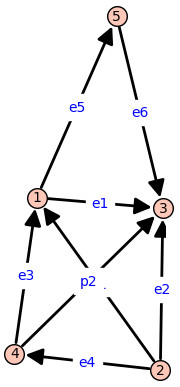

In [17]:
Graph1.plot(edge_labels=True)

In [18]:
Graph1.incidence_matrix(oriented=True)

[-1 -1  1  0  0  1  0  0]
[ 0  0 -1 -1 -1  0  0  0]
[ 1  0  0  1  0  0  1  1]
[ 0  0  0  0  1 -1 -1  0]
[ 0  1  0  0  0  0  0 -1]

In [19]:
#Graph1.incidence_matrix(oriented=True, edges=[3,7,1,4,6,5,2,7])
#Graph1.incidence_matrix(oriented=True, edges=['p1','p2','e1','e2','e3','e4','e5'])
Graph1.edges()
NalFull=Graph1.incidence_matrix(oriented=True, edges=
                        [(2, 1, 'p1'), (4, 3, 'p2'), (1, 3, 'e1'),  (2, 3, 'e2'), (4, 1, 'e3'), (2, 4, 'e4'), (1, 5, 'e5'),  (5, 3, 'e6')])
NalFull

[ 1  0 -1  0  1  0 -1  0]
[-1  0  0 -1  0 -1  0  0]
[ 0  1  1  1  0  0  0  1]
[ 0 -1  0  0 -1  1  0  0]
[ 0  0  0  0  0  0  1 -1]

In [20]:
Nal=NalFull.delete_rows([4])
Nal

[ 1  0 -1  0  1  0 -1  0]
[-1  0  0 -1  0 -1  0  0]
[ 0  1  1  1  0  0  0  1]
[ 0 -1  0  0 -1  1  0  0]

In [21]:
NbePe = matrix([
    [0,  0,  -1,  0,  0,  0, 1, 1],
    [-1,  0, -1,  1,  0,  0, 0, 0],
    [-1, +1, -1,  0,  0, +1, 0, 0],
    [0,  -1, +1,  0, +1,  0, 0, 0]
    ])

In [22]:
NbePe


[ 0  0 -1  0  0  0  1  1]
[-1  0 -1  1  0  0  0  0]
[-1  1 -1  0  0  1  0  0]
[ 0 -1  1  0  1  0  0  0]

In [23]:
NalG=Nal*diagonal_matrix([1,1,g1,g2,g3,g4,g5,g6]);NalG

[  1   0 -g1   0  g3   0 -g5   0]
[ -1   0   0 -g2   0 -g4   0   0]
[  0   1  g1  g2   0   0   0  g6]
[  0  -1   0   0 -g3  g4   0   0]

In [24]:
NbePeR=NbePe*diagonal_matrix([1,1,r1,r2,r3,r4,r5,r6]);NbePeR

[  0   0 -r1   0   0   0  r5  r6]
[ -1   0 -r1  r2   0   0   0   0]
[ -1   1 -r1   0   0  r4   0   0]
[  0  -1  r1   0  r3   0   0   0]

In [25]:
for i in range(0,cr): 
    for j in range(0,r):
        print(NbePeR[i]*NalG[j])


r1*g1 - r5*g5
0
-r1*g1 + r6*g6
0
r1*g1 - 1
-r2*g2 + 1
-r1*g1 + r2*g2
0
r1*g1 - 1
-r4*g4 + 1
-r1*g1 + 1
r4*g4 - 1
-r1*g1 + r3*g3
0
r1*g1 - 1
-r3*g3 + 1


In [26]:
Lal=NalG*(matrix([[pa1,pa2,e1,e2,e3,e4,e5,e6]]).transpose());Lal

[pa1 - g1*e1 + g3*e3 - g5*e5]
[       -pa1 - g2*e2 - g4*e4]
[pa2 + g1*e1 + g2*e2 + g6*e6]
[       -pa2 - g3*e3 + g4*e4]

In [27]:
Lbe=NbePeR*(matrix([[pb1,pb2,e1,e2,e3,e4,e5,e6]]).transpose());Lbe

[    -r1*e1 + r5*e5 + r6*e6]
[      -pb1 - r1*e1 + r2*e2]
[-pb1 + pb2 - r1*e1 + r4*e4]
[      -pb2 + r1*e1 + r3*e3]

In [28]:
dictLal=Lal.dict();dictLal

{(0, 0): pa1 - g1*e1 + g3*e3 - g5*e5,
 (1, 0): -pa1 - g2*e2 - g4*e4,
 (2, 0): pa2 + g1*e1 + g2*e2 + g6*e6,
 (3, 0): -pa2 - g3*e3 + g4*e4}

In [29]:
dictLbe=Lbe.dict();dictLbe

{(0, 0): -r1*e1 + r5*e5 + r6*e6,
 (1, 0): -pb1 - r1*e1 + r2*e2,
 (2, 0): -pb1 + pb2 - r1*e1 + r4*e4,
 (3, 0): -pb2 + r1*e1 + r3*e3}

In [30]:
hack1=dictLal.get((0,0));hack1

pa1 - g1*e1 + g3*e3 - g5*e5

In [31]:
hack2=dictLal.get((1,0));hack2

-pa1 - g2*e2 - g4*e4

In [32]:
hack1*hack2

-g1*pa1*e1 - g2*pa1*e2 + g3*pa1*e3 - g4*pa1*e4 - g5*pa1*e5 + g1*g2*e1*e2 + g1*g4*e1*e4 + g2*g3*e2*e3 - g2*g5*e2*e5 - g3*g4*e3*e4 - g4*g5*e4*e5

In [33]:
ResAl=1
for i in range(0,r):
    print(i)
    print(dictLal.get((i,0)))
    ResAl=ResAl*(dictLal.get((i,0)))
print("ResAl")
print(ResAl)
ResBe=1
for i in range(0,cr):
    print(i)
    print(dictLbe.get((i,0)))
    print(" ")
    ResBe=ResBe*(dictLbe.get((i,0)))
print("ResBe")
print(ResBe)
Res=ResAl*ResBe
print("final result")
print(Res)
Reslist=Res.list()
print("\n Res list:\n")
Reslist


0
pa1 - g1*e1 + g3*e3 - g5*e5
1
-pa1 - g2*e2 - g4*e4
2
pa2 + g1*e1 + g2*e2 + g6*e6
3
-pa2 - g3*e3 + g4*e4
ResAl
-g1*g5*pa1*pa2*e1*e5 + g1*g6*pa1*pa2*e1*e6 - g2*g5*pa1*pa2*e2*e5 + g2*g6*pa1*pa2*e2*e6 + g3*g5*pa1*pa2*e3*e5 - g3*g6*pa1*pa2*e3*e6 - g4*g5*pa1*pa2*e4*e5 + g4*g6*pa1*pa2*e4*e6 + g5*g6*pa1*pa2*e5*e6 + g1*g3*g5*pa1*e1*e3*e5 - g1*g3*g6*pa1*e1*e3*e6 - g1*g4*g5*pa1*e1*e4*e5 + g1*g4*g6*pa1*e1*e4*e6 + g2*g3*g5*pa1*e2*e3*e5 - g2*g3*g6*pa1*e2*e3*e6 - g2*g4*g5*pa1*e2*e4*e5 + g2*g4*g6*pa1*e2*e4*e6 + g3*g5*g6*pa1*e3*e5*e6 - g4*g5*g6*pa1*e4*e5*e6 - g1*g2*g5*pa2*e1*e2*e5 + g1*g2*g6*pa2*e1*e2*e6 - g1*g4*g5*pa2*e1*e4*e5 + g1*g4*g6*pa2*e1*e4*e6 - g2*g3*g5*pa2*e2*e3*e5 + g2*g3*g6*pa2*e2*e3*e6 - g2*g5*g6*pa2*e2*e5*e6 + g3*g4*g5*pa2*e3*e4*e5 - g3*g4*g6*pa2*e3*e4*e6 - g4*g5*g6*pa2*e4*e5*e6 - g1*g2*g3*g5*e1*e2*e3*e5 + g1*g2*g3*g6*e1*e2*e3*e6 + g1*g2*g4*g5*e1*e2*e4*e5 - g1*g2*g4*g6*e1*e2*e4*e6 + g1*g3*g4*g5*e1*e3*e4*e5 - g1*g3*g4*g6*e1*e3*e4*e6 + g2*g3*g4*g5*e2*e3*e4*e5 - g2*g3*g4*g6*e2*e3*e4*e6 + g

[((2, 3, 4, 5, 6, 7, 8, 10), r1*r3*g2*g5 - r1*r2*g3*g5),
 ((2, 3, 4, 5, 6, 7, 8, 11), -r1*r3*g2*g6 + r1*r2*g3*g6),
 ((2, 3, 4, 5, 6, 7, 9, 10), r1*r4*g2*g5 + r1*r2*g4*g5),
 ((2, 3, 4, 5, 6, 7, 9, 11), -r1*r4*g2*g6 - r1*r2*g4*g6),
 ((2, 3, 4, 5, 6, 7, 10, 11),
  -r2*r6*g1*g5 - r1*r6*g2*g5 - r2*r5*g1*g6 - r1*r5*g2*g6 - r1*r2*g5*g6),
 ((2, 3, 4, 5, 6, 8, 9, 10), -r1*r4*g3*g5 - r1*r3*g4*g5),
 ((2, 3, 4, 5, 6, 8, 9, 11), r1*r4*g3*g6 + r1*r3*g4*g6),
 ((2, 3, 4, 5, 6, 8, 10, 11),
  r3*r6*g1*g5 + r1*r6*g3*g5 + r3*r5*g1*g6 + r1*r5*g3*g6 + r1*r3*g5*g6),
 ((2, 3, 4, 5, 6, 9, 10, 11),
  r4*r6*g1*g5 - r1*r6*g4*g5 + r4*r5*g1*g6 - r1*r5*g4*g6 + r1*r4*g5*g6),
 ((2, 3, 4, 5, 7, 8, 10, 11),
  r3*r6*g2*g5 - r2*r6*g3*g5 + r3*r5*g2*g6 - r2*r5*g3*g6),
 ((2, 3, 4, 5, 7, 9, 10, 11),
  r4*r6*g2*g5 + r2*r6*g4*g5 + r4*r5*g2*g6 + r2*r5*g4*g6),
 ((2, 3, 4, 5, 8, 9, 10, 11),
  -r4*r6*g3*g5 - r3*r6*g4*g5 - r4*r5*g3*g6 - r3*r5*g4*g6),
 ((2, 3, 4, 6, 7, 8, 9, 10), -r1*r3*r4*g2*g5 - r1*r2*r3*g4*g5),
 ((2, 3, 4, 6, 7, 8

In [34]:
(-r3*r4*r6*g1*g2*g5 - r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 - r1*r2*r6*g3*g4*g5 - r3*r4*r5*g1*g2*g6 - r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r5*g3*g4*g6 - r1*r3*r4*g2*g5*g6 - r1*r2*r3*g4*g5*g6)*pa2*pb1*e1*e2*e3*e4*e5*e6 + (-r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 - r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r2*r3*g4*g5*g6)*pa2*pb2*e1*e2*e3*e4*e5*e6 + (r4*r6*g1*g2*g3*g5 + r3*r6*g1*g2*g4*g5 + r2*r6*g1*g3*g4*g5 + r1*r6*g2*g3*g4*g5 + r4*r5*g1*g2*g3*g6 + r3*r5*g1*g2*g4*g6 + r2*r5*g1*g3*g4*g6 + r1*r5*g2*g3*g4*g6 + r1*r4*g2*g3*g5*g6 + r1*r3*g2*g4*g5*g6 + r1*r2*g3*g4*g5*g6)*pb1*pb2*e1*e2*e3*e4*e5*e6



(-r3*r4*r6*g1*g2*g5 - r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 - r1*r2*r6*g3*g4*g5 - r3*r4*r5*g1*g2*g6 - r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r5*g3*g4*g6 - r1*r3*r4*g2*g5*g6 - r1*r2*r3*g4*g5*g6)*pa2*pb1*e1*e2*e3*e4*e5*e6 + (-r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 - r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r2*r3*g4*g5*g6)*pa2*pb2*e1*e2*e3*e4*e5*e6 + (r4*r6*g1*g2*g3*g5 + r3*r6*g1*g2*g4*g5 + r2*r6*g1*g3*g4*g5 + r1*r6*g2*g3*g4*g5 + r4*r5*g1*g2*g3*g6 + r3*r5*g1*g2*g4*g6 + r2*r5*g1*g3*g4*g6 + r1*r5*g2*g3*g4*g6 + r1*r4*g2*g3*g5*g6 + r1*r3*g2*g4*g5*g6 + r1*r2*g3*g4*g5*g6)*pb1*pb2*e1*e2*e3*e4*e5*e6

In [35]:
(-r3*r4*r6*g1*g2*g5 - r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 - r1*r2*r6*g3*g4*g5 - r3*r4*r5*g1*g2*g6 - r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r5*g3*g4*g6 - r1*r3*r4*g2*g5*g6 - r1*r2*r3*g4*g5*g6)*pa2*pb1

(-r3*r4*r6*g1*g2*g5 - r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 - r1*r2*r6*g3*g4*g5 - r3*r4*r5*g1*g2*g6 - r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r5*g3*g4*g6 - r1*r3*r4*g2*g5*g6 - r1*r2*r3*g4*g5*g6)*pa2*pb1

In [36]:
(-r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 - r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r2*r3*g4*g5*g6)*pa2*pb2


(-r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 - r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r2*r3*g4*g5*g6)*pa2*pb2

In [37]:
(r4*r6*g1*g2*g3*g5 + r3*r6*g1*g2*g4*g5 + r2*r6*g1*g3*g4*g5 + r1*r6*g2*g3*g4*g5 + r4*r5*g1*g2*g3*g6 + r3*r5*g1*g2*g4*g6 + r2*r5*g1*g3*g4*g6 + r1*r5*g2*g3*g4*g6 + r1*r4*g2*g3*g5*g6 + r1*r3*g2*g4*g5*g6 + r1*r2*g3*g4*g5*g6)*pb1*pb2


(r4*r6*g1*g2*g3*g5 + r3*r6*g1*g2*g4*g5 + r2*r6*g1*g3*g4*g5 + r1*r6*g2*g3*g4*g5 + r4*r5*g1*g2*g3*g6 + r3*r5*g1*g2*g4*g6 + r2*r5*g1*g3*g4*g6 + r1*r5*g2*g3*g4*g6 + r1*r4*g2*g3*g5*g6 + r1*r3*g2*g4*g5*g6 + r1*r2*g3*g4*g5*g6)*pb1*pb2

In [38]:
type(Res)

<class 'sage.algebras.clifford_algebra.ExteriorAlgebra_with_category.element_class'>

In [39]:
type(Reslist)

<class 'list'>

In [40]:
Reslist[0]

((2, 3, 4, 5, 6, 7, 8, 10), r1*r3*g2*g5 - r1*r2*g3*g5)

In [41]:
Reslist[0][0][2:8]

(4, 5, 6, 7, 8, 10)

In [42]:
Reslist[0][0][2:8] == (4,5,6,7,8,10)

True

In [43]:
tuple(range(4,11))

(4, 5, 6, 7, 8, 9, 10)

In [44]:
Reslist[0][0][2:8] == tuple(range(4,11))

False

In [45]:
tuple(range(4,11))

(4, 5, 6, 7, 8, 9, 10)

In [46]:
RESULT=0
for thing in Reslist:
#    print(thing[0])
    if thing[0][p:p+n]==tuple(range(3*p,3*p+n)):
#        print(" \n", thing)
        prgens=1
        for i in thing[0][0:p]:
            prgens=prgens*(Ext.gens()[i])
        print(" \nMonomial:", prgens)
        print("Coef:",thing[1])
        term = thing[1]*prgens
#        print(" \n", term)
        RESULT = RESULT + term
#print("\nHERE IT IS:", RESULT)

 
Monomial: pa1*pa2
Coef: r2*r3*r4*r6*g1*g5 + r1*r3*r4*r6*g2*g5 + r1*r2*r4*r6*g3*g5 + r1*r2*r3*r6*g4*g5 + r2*r3*r4*r5*g1*g6 + r1*r3*r4*r5*g2*g6 + r1*r2*r4*r5*g3*g6 + r1*r2*r3*r5*g4*g6 + r1*r2*r3*r4*g5*g6
 
Monomial: pa1*pb1
Coef: r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 + r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r3*g4*g5*g6
 
Monomial: pa1*pb2
Coef: r2*r4*r6*g1*g3*g5 + r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 + r1*r3*r6*g2*g4*g5 + r2*r4*r5*g1*g3*g6 + r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r3*r5*g2*g4*g6 + r1*r2*r4*g3*g5*g6 + r1*r2*r3*g4*g5*g6
 
Monomial: pa2*pb1
Coef: -r3*r4*r6*g1*g2*g5 - r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 - r1*r2*r6*g3*g4*g5 - r3*r4*r5*g1*g2*g6 - r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r5*g3*g4*g6 - r1*r3*r4*g2*g5*g6 - r1*r2*r3*g4*g5*g6
 
Monomial: pa2*pb2
Coef: -r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 - r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r2*r3*g4*g5*g6
 
Monomial: pb1*pb2
Coef: r4*r6*g1*g2*g3*g5 + r3*r6*g1*g2*g4*g5 + r2*r6*g1*g3*g4*g5 + r1*r6*g2*g3*

In [47]:
RESULT.list()

[((2, 3),
  r2*r3*r4*r6*g1*g5 + r1*r3*r4*r6*g2*g5 + r1*r2*r4*r6*g3*g5 + r1*r2*r3*r6*g4*g5 + r2*r3*r4*r5*g1*g6 + r1*r3*r4*r5*g2*g6 + r1*r2*r4*r5*g3*g6 + r1*r2*r3*r5*g4*g6 + r1*r2*r3*r4*g5*g6),
 ((2, 4),
  r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 + r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r3*g4*g5*g6),
 ((2, 5),
  r2*r4*r6*g1*g3*g5 + r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 + r1*r3*r6*g2*g4*g5 + r2*r4*r5*g1*g3*g6 + r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r3*r5*g2*g4*g6 + r1*r2*r4*g3*g5*g6 + r1*r2*r3*g4*g5*g6),
 ((3, 4),
  -r3*r4*r6*g1*g2*g5 - r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 - r1*r2*r6*g3*g4*g5 - r3*r4*r5*g1*g2*g6 - r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r5*g3*g4*g6 - r1*r3*r4*g2*g5*g6 - r1*r2*r3*g4*g5*g6),
 ((3, 5),
  -r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 - r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r2*r3*g4*g5*g6),
 ((4, 5),
  r4*r6*g1*g2*g3*g5 + r3*r6*g1*g2*g4*g5 + r2*r6*g1*g3*g4*g5 + r1*r6*g2*g3*g4*g5 + r4*r5*g1*g2*g3*g6 + r3*r5*g1*g2*g4*g6 + r2*r5*g1*g3*g4*g6 + r1*r5*

In [48]:
RESULT


(r2*r3*r4*r6*g1*g5 + r1*r3*r4*r6*g2*g5 + r1*r2*r4*r6*g3*g5 + r1*r2*r3*r6*g4*g5 + r2*r3*r4*r5*g1*g6 + r1*r3*r4*r5*g2*g6 + r1*r2*r4*r5*g3*g6 + r1*r2*r3*r5*g4*g6 + r1*r2*r3*r4*g5*g6)*pa1*pa2 + (r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 + r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r3*g4*g5*g6)*pa1*pb1 + (r2*r4*r6*g1*g3*g5 + r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 + r1*r3*r6*g2*g4*g5 + r2*r4*r5*g1*g3*g6 + r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r3*r5*g2*g4*g6 + r1*r2*r4*g3*g5*g6 + r1*r2*r3*g4*g5*g6)*pa1*pb2 + (-r3*r4*r6*g1*g2*g5 - r1*r4*r6*g2*g3*g5 - r2*r3*r6*g1*g4*g5 - r1*r2*r6*g3*g4*g5 - r3*r4*r5*g1*g2*g6 - r1*r4*r5*g2*g3*g6 - r2*r3*r5*g1*g4*g6 - r1*r2*r5*g3*g4*g6 - r1*r3*r4*g2*g5*g6 - r1*r2*r3*g4*g5*g6)*pa2*pb1 + (-r1*r4*r6*g2*g3*g5 + r2*r3*r6*g1*g4*g5 - r1*r4*r5*g2*g3*g6 + r2*r3*r5*g1*g4*g6 + r1*r2*r3*g4*g5*g6)*pa2*pb2 + (r4*r6*g1*g2*g3*g5 + r3*r6*g1*g2*g4*g5 + r2*r6*g1*g3*g4*g5 + r1*r6*g2*g3*g4*g5 + r4*r5*g1*g2*g3*g6 + r3*r5*g1*g2*g4*g6 + r2*r5*g1*g3*g4*g6 + r1*r5*g2*g3*g4*g6 + r1*r4*g

In [49]:
type(g5*g2*pa1)

<class 'sage.algebras.clifford_algebra.ExteriorAlgebra_with_category.element_class'>

In [50]:
(g5*g2*pa1).subs(g5=0)

g2*g5*pa1

In [51]:
type(g5)

<class 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>